### Initial Code to Run

In [1]:
import Interval_Matrix_Algebra_Calculator_v1 as imac
import portion as P
import matplotlib.pyplot as plt
import numpy as np
import interval_distance_functions as idf
from mpl_toolkits import mplot3d
from graph_tool.all import *
import os
import pandas as pd
import TVGMatrix as tvg

import propagation_test_bench as ptb
#Big ol' import list

In [2]:
#Getting our test matrix set up

oi = [P.open(-P.inf,P.inf), 0]
ab = [P.open(0,10), 1]
ac = [P.open(0,10), 3]
bc = [P.empty(), P.inf]
ad = [P.empty(), P.inf]
bd = [P.open(9,15), 3]
cd = [P.open(9,10), 2]
    
B = [[[oi], [ab], [ac], [ad]],
    [[ab], [oi], [bc], [bd]],
    [[ac], [bc], [oi], [cd]],
    [[ad], [bd], [cd], [oi]]]
B = pd.DataFrame(B, index=["A",'B','C','D'], columns=["A",'B','C','D'])
B = imac.remove_diagonal(B)

C = ptb.multiply_with_propagation(B, B)
D = ptb.multiply_with_propagation(C, B)
E = ptb.multiply_with_propagation(D, B)

### Simulations of Signal Propagation Delay

               A              B              C              D
A   [[(), +inf]]  [[(0,10), 1]]  [[(0,10), 3]]   [[(), +inf]]
B  [[(0,10), 1]]   [[(), +inf]]   [[(), +inf]]  [[(9,15), 3]]
C  [[(0,10), 3]]   [[(), +inf]]   [[(), +inf]]  [[(9,10), 2]]
D   [[(), +inf]]  [[(9,15), 3]]  [[(9,10), 2]]   [[(), +inf]]


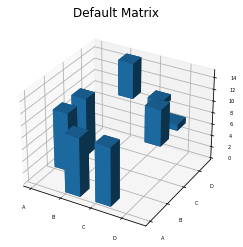

                          A             B                          C   D
A  [[(0,8), 2], [(0,4), 6]]            []                         []  []
B                        []  [[(0,8), 2]]  [[(0,6), 4], [(9,10), 5]]  []
C                        []  [[(0,6), 4]]               [[(0,4), 6]]  []
D             [[(8,10), 4]]            []                         []  []


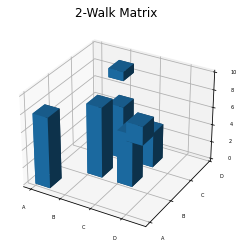

                          A                         B  \
A                        []  [[(0,7), 3], [(0,3), 7]]   
B  [[(0,7), 3], [(0,3), 7]]                        []   
C  [[(0,5), 5], [(0,1), 9]]                        []   
D                        []              [[(7,8), 5]]   

                          C   D  
A  [[(0,5), 5], [(0,1), 9]]  []  
B                        []  []  
C                        []  []  
D              [[(5,6), 7]]  []  


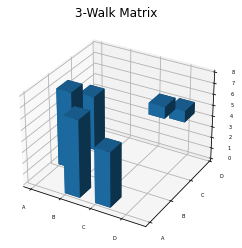

                                      A                         B  \
A  [[(0,6), 4], [(0,2), 8], [(0,2), 8]]                        []   
B                                    []  [[(0,6), 4], [(0,2), 8]]   
C                                    []              [[(0,4), 6]]   
D             [[(6,7), 6], [(2,3), 10]]                        []   

              C   D  
A            []  []  
B  [[(0,4), 6]]  []  
C  [[(0,2), 8]]  []  
D            []  []  


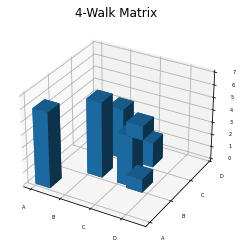

0

In [3]:
print(B)
imac.cb3d(ptb.forget_times(B),title="Default Matrix", upper_triangular=False)
print(C)
imac.cb3d(ptb.forget_times(C),title="2-Walk Matrix", upper_triangular=False)
print(D)
imac.cb3d(ptb.forget_times(D),title="3-Walk Matrix", upper_triangular=False)
print(E)
imac.cb3d(ptb.forget_times(E),title="4-Walk Matrix", upper_triangular=False)

### Beginning Analysis on Bandwidth Limitations

               A              B              C              D
A   [[(), +inf]]  [[(0,10), 1]]  [[(0,10), 3]]   [[(), +inf]]
B  [[(0,10), 1]]   [[(), +inf]]   [[(), +inf]]  [[(9,15), 3]]
C  [[(0,10), 3]]   [[(), +inf]]   [[(), +inf]]  [[(9,10), 2]]
D   [[(), +inf]]  [[(9,15), 3]]  [[(9,10), 2]]   [[(), +inf]]


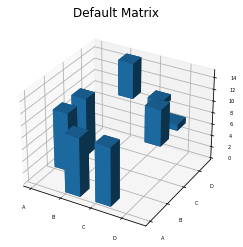

0

In [4]:
print(B)
imac.cb3d(ptb.forget_times(B),title="Default Matrix", upper_triangular=False)

               A              B              C     D
A           [()]  [[(0,10), 1]]  [[(0,10), 3]]  [()]
B  [[(0,10), 1]]           [()]           [()]  [()]
C  [[(0,10), 3]]           [()]           [()]  [()]
D           [()]           [()]           [()]  [()]


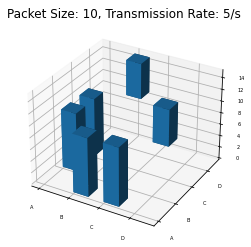

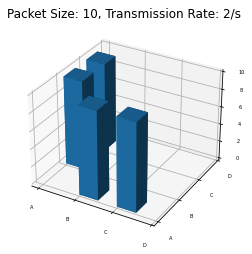

ValueError: zero-size array to reduction operation minimum which has no identity

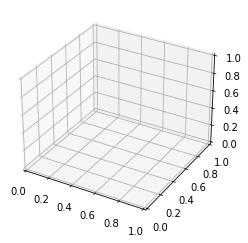

In [6]:
print(ptb.transmission_times(B, 10, 2))
imac.cb3d(ptb.forget_times(ptb.transmission_times(B, 10, 5)),title="Packet Size: 10, Transmission Rate: 5/s", upper_triangular=False)
imac.cb3d(ptb.forget_times(ptb.transmission_times(B, 10, 2)),title="Packet Size: 10, Transmission Rate: 2/s", upper_triangular=False)
imac.cb3d(ptb.forget_times(ptb.transmission_times(B, 10, 1)),title="Packet Size: 10, Transmission Rate: 1/s", upper_triangular=False)

